In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

qa_pairs_train_path = './vqa_train_df.tsv'
qa_pairs_val_path = './vqa_val_df.tsv'

In [2]:
qa_pairs_df = pd.read_csv(qa_pairs_train_path, sep='\t')

In [3]:
qa_pairs_df['answer'].value_counts()

yes              253109
no               243915
wall               5691
sky                5682
tree               4545
right              3499
building           3257
table              3117
floor              3079
light              2616
window             2544
road               2472
chair              2248
frame              2107
plant              1955
grass              1744
middle             1743
people             1701
vehicle            1573
wooden             1529
glass              1521
person             1404
two                1398
front              1388
door               1365
ceiling            1324
lamp               1302
board              1270
pole               1266
bed                1232
                  ...  
machinery             5
pen holder            5
water surface         5
picket fence          5
scarf                 5
moss                  5
direction             5
dust bin              5
hand railing          5
wave                  5
scrap           

In [4]:
qa_pairs_df.head(50)
df = qa_pairs_df

In [5]:
# 'where' question
where_q = df[
    (
        df['question'].str.contains('where', case=False)
        & ~df['question'].str.contains('what', case=False)
    )
    | (df['answer'] == 'right')
    | (df['answer'] == 'left')
]

# 'what color' question
what_color_q = df[df['question'].str.contains('what color', case=False)]

# 'how many' question
how_many_q = df[df['question'].str.contains('how many', case=False)]

# 'yes/no' question
binary_q = df[(df['answer'] == 'yes') | (df['answer'] == 'no')]

# object question
object_q = df[
    (~df.index.isin(where_q.index))
    & (~df.index.isin(what_color_q.index))
    & (~df.index.isin(how_many_q.index))
    & (~df.index.isin(binary_q.index))
]


In [6]:
print(len(where_q.index))
print(len(what_color_q.index))
print(len(how_many_q.index))
print(len(binary_q.index))
print(len(object_q.index))
q_stats = {
    'where': len(where_q.index),
    'what_color': len(what_color_q.index),
    'how_many': len(how_many_q.index),
    'binary': len(binary_q.index),
    'object': len(object_q.index)
}

7478
3876
2507
497024
111075


In [7]:
import matplotlib.pyplot as plt

def draw_question_distribution(qs):
    scene_names = qs.keys()
    scene_counts = qs.values()
    x_pos = [i for i, _ in enumerate(scene_names)]

    plt.barh(x_pos, scene_counts, color='green')
    plt.ylabel("Scene name")
    plt.xlabel("Number of images")
    plt.title("Distribution of scenes from ADE20K")

    plt.yticks(x_pos, scene_names)

    plt.show()

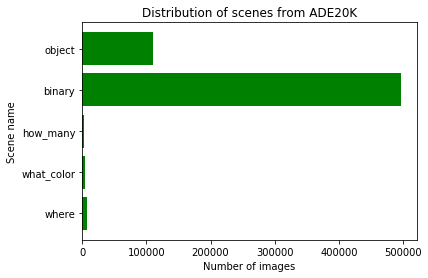

In [8]:
draw_question_distribution(q_stats)

In [9]:
object_q[object_q['answer'] == 'blue']

,img_id,question,answer


In [10]:
what_color_q['answer'].unique()

array(['black', 'clear', 'blue', 'green', 'white', 'brown', 'yellow',
       'cloudy', 'red', 'pink', 'different', 'orange', 'light', 'grey',
       'dark', 'maroon', 'gray', 'sky', 'flag', 'color', 'cream',
       'wooden', 'silver', 'colorful', 'snow', 'dress', 'tree', 'blur',
       'blurry', 'flush', 'wall', 'paint', 'flower', 'bush', 'sheet',
       'road', 'sand', 'cap', 'pant', 'curtain'], dtype=object)

In [12]:
where_q.to_csv('./where_q_val.csv')
what_color_q.to_csv('./what_color_q_val.csv')
how_many_q.to_csv('./how_many_q_val.csv')
binary_q.to_csv('./binary_q_val.csv')
object_q.to_csv('./object_q_val.csv')

In [13]:
sample = object_q.sample(n=1)

In [64]:
sample

,img_id,question,answer
18772,ADE_val_00000886,What is at the top of the hall?,roof


In [66]:
sample2 = binary_q.sample(n=1)
sample2

,img_id,question,answer
19261,ADE_val_00001513,Is there a showcase?,no


In [67]:
sample3 = how_many_q.sample(n=1)
sample3

,img_id,question,answer
10966,ADE_val_00000253,How many people sit on the chairs holding a de...,two


In [70]:
list(sample3['question'])

['How many people sit on the chairs holding a device?']

In [71]:
sample4 = what_color_q.sample(n=1)

In [72]:
sample4

,img_id,question,answer
47097,ADE_val_00000378,What color is the wall in the gate?,white


In [73]:
sample5 = where_q.sample()

In [74]:
sample5

,img_id,question,answer
64416,ADE_val_00000308,Where are so many things and objects placed?,table


In [58]:
import plotly.graph_objects as go

def draw_qa_bar(starts_with):
    new_df = df[df['question'].str.startswith(starts_with)]
    data=[starts_with]
    bars = []
    row_count = len(new_df)
    v_counts = new_df['answer'].value_counts(normalize=True)

    for i, value in enumerate(v_counts):
        bars.append(
            go.Bar(x=data, y=[value], text=v_counts.index[i], textposition='auto', width=0.1)
        )

    fig = go.Figure(data=bars)
    # Change the bar mode
    fig.update_layout(barmode='stack')
    fig.show()

In [59]:
draw_qa_bar('What color')

In [60]:
draw_qa_bar('Are')

In [61]:
draw_qa_bar('How many')

In [62]:
draw_qa_bar('What')

In [63]:
draw_qa_bar('Is')

In [64]:
draw_qa_bar('On what')

In [65]:
draw_qa_bar('What kind')

In [66]:
draw_qa_bar('What sport')

In [71]:
draw_qa_bar('What side')

In [72]:
draw_qa_bar('What animal')

In [77]:
draw_qa_bar('How are')

In [84]:
draw_qa_bar('On which')